# Notebook for Summary, Visualization, and Illustration

**Kumar Harsh** and **Sewoong Lee**

{kumarha2, samuel27}@illinois.edu

## 1. Summary of the Paper

Prediction of in-patient **length of stay (LoS)** is an important and difficult task - as it accounts for about 90% of inter-patient variation in hospital costs in the US, and is also associated with more serious outcomes like infections and fatality. Prediction of good length of stay estimates promises various benefits:
 - Increased accuracy of predictions, which can enable more sophisticated planning strategies.
 - Reduced administrative burden on clinicians,freeing them up to focus on patient care.
 - Improved patient experiences, as patients are more likely to be discharged on time and have a better understanding of their discharge date.
 
However, there are many challenges in gathering the data required and developing models for making these predictions. Rocheteau et al. (2020) proposes a new model - Temporal Pointwise Convolution (TPC) - which aims to mitigate challenges with EHR data, such as data skew, missing data, and irregular sampling. The model claims to provide a significant performance benefit of 18-68% over LSTM networks and Transformers.

## 2. Overview of the Data

In [1]:
import time
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from eICU_preprocessing.reader import eICUReader
from MIMIC_preprocessing.reader import MIMICReader
from eICU_preprocessing.run_all_preprocessing import eICU_path
from MIMIC_preprocessing.run_all_preprocessing import MIMIC_path
import json

In [2]:
total_start = time.time()

In [3]:
!python -V
torch.__version__, torch.cuda.is_available()

Python 3.6.8


('1.9.1+cu111', True)

In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [5]:
eICU_path, MIMIC_path

('D:/datasets/eicu/', 'D:/datasets/mimic-iv-0.4/')

In [6]:
eicu_reader = eICUReader(eICU_path + 'train', device = device)
mimic_reader = MIMICReader(MIMIC_path + 'train', device = device)

### 2.1. Length of Stay Distribution

#### 2.1.1. eICU

Data Count:  102749


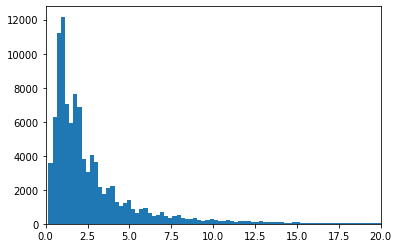

In [7]:
plt.hist(eicu_reader.labels.actualiculos, bins=1000)
plt.xlim([0,20])
print("Data Count: ", len(eicu_reader.labels.actualiculos))
plt.show()

#### 2.1.2. MIMIC-IV

Data Count:  48848


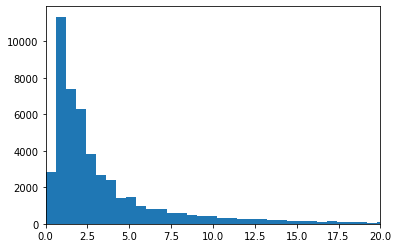

In [8]:
plt.hist(mimic_reader.labels.actualiculos, bins=1000)
plt.xlim([0,20])
print("Data Count: ", len(mimic_reader.labels.actualiculos))
plt.show()

MIMIC-IV has less data than eICU, but overall shape is similar.

## 3. Experiments

### 3.1. Measuring MSLE for Each Model
#### 3.1.1. Overview
Validation MSLE (Mean Square Logarithmic Error)

**Models**
 - TPC
 - LSTM
 - Transformers

#### 3.1.2. Code Examples

**TPC Model Type**
 - `tpc` : Temporal Pointwise Convolution
 - `temp_only` : Temporal Convolution Only
 - `pointwise_only` : Pointwise Convolution Only

In [9]:
time_perf = {}

In [10]:
start = time.time()
!python -m models.run_tpc --model_type pointwise_only --n_epochs 5
end = time.time()
time_perf["pointwise_only"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:70.60 min
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,

    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "pointwise_only",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 4052764168,
    "sh

In [11]:
start = time.time()
!python -m models.run_tpc --model_type temp_only --n_epochs 5
end = time.time()
time_perf["temp_only"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "temp_only",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 528032389,
    "share_weights": fa

      766]
 [  90011  337043  188872   74084   32118   15458    8283    4797    7799
     1528]
 [  28198  141761  151684   82919   41850   22764   12707    7647   13429
     3071]
 [  11772   65081   96460   69983   41782   24735   15433    9941   19051
     5038]
 [   6278   34647   60385   52426   35778   23224   15436   10423   22289
     7169]
 [   3593   21027   40063   38190   28604   19965   14097    9824   23322
     8755]
 [   2071   13316   27233   28162   22495   16626   12375    8822   22676
     9965]
 [   5269   31700   66760   74626   64860   52255   41651   32348   94315
    58042]
 [   2434   13937   33584   41134   38660   32896   27248   22407   70075
    54453]]
Mean absolute deviation (MAD) = 2.351197217433573
Mean squared error (MSE) = 33.21989795725816
Mean absolute percentage error (MAPE) = 93.89834723353857
Mean squared logarithmic error (MSLE) = 1.0401778704700433
R^2 Score = 0.09391236797243574
Cohen kappa score = 0.5256813256084676
Epoch: 2 | Train Loss: 65

In [12]:
start = time.time()
!python -m models.run_tpc --model_type tpc --n_epochs 5
end = time.time()
time_perf["tpc"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "tpc",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 1013645030,
    "share_weights": false,


In [13]:
start = time.time()
!python -m models.run_lstm --n_epochs 5
end = time.time()
time_perf["lstm"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Custom bins confusion matrix:
[[1582917  435752   55589   16481    6122    2771    1344     758    1090
      179]
 [ 315037  687051  158031   44717   16708    7484    3804    2065    3109
      445]
 [  43329  312906  239715   89290   36322   16611    8585    4786    7285
     1164]
 [  11920   97079  171653  105078   52978   27297   14850    8579   14226
     2370]
 [   5484   35940   91391   82483   53830   32538   19547   12126   21674
     4263]
 [   3216   17642   49306   55366   43610   30501   20314   13720   27677
     6703]
 [   2009    9973   28766   36885   32793   24959   18422   13399   30833
     9401]
 [   1157    5856   17758   24909   23838   19856   15309   12060   31273
    11725]
 [   2907   12524   37957   56827   60618   55164   47533   39588  128649
    80059]
 [   1518    5733   17520   27218   31545   30443   28189   24811   91722
    78129]]
Mean absolute deviation (MAD) = 2.0855179711452636
Mean squared error (MSE) = 29.565370410468294
Mean absolute percenta

 [ 14133  39301  20271  15020   9687   4947   2033    833    562      0]
 [  7536  23640  15524  12180   8565   4583   2125    744    645      0]
 [  4588  16191  11562   9950   7242   4186   2022    759    648      0]
 [  3049  10419   8872   8181   6098   3701   1693    857    590      0]
 [  2021   7552   6900   6636   5264   3439   1749    632    432      0]
 [  3884  20300  21742  22564  19766  12408   6276   2597   1659      0]
 [  2089  10150  12544  14961  13113   9013   5527   2909   1382      0]]
Mean absolute deviation (MAD) = 2.73898931260554
Mean squared error (MSE) = 59.287092600355116
Mean absolute percentage error (MAPE) = 125.61769385214292
Mean squared logarithmic error (MSLE) = 1.5053134056937225
R^2 Score = 0.038768171681837105
Cohen kappa score = 0.28666088956552627
Epoch: 3 | Validation Loss: 93.9582
Train Metrics:
==> Length of Stay:
Custom bins confusion matrix:
[[1041103  825026  136301   47787   22287   11587    6722    3996    6918
     1276]
 [ 373897  55572

In [14]:
start = time.time()
!python -m models.run_transformer --n_epochs 5
end = time.time()
time_perf["transformer"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/Transformer",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "d_model": 16,
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "Transformer",
    "feedforward_size": 256,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00017,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 5,
    "n_heads": 2,
    "n_layers": 6,
    "name": "Transformer",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "positional_encoding": false,
    "save_results_csv": false,
    "seed": 4038317558,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS",
    "trans_dropout_rate": 0
}
Experiment set up.
Transformer(
  (relu): ReLU()
  (sigmoid): Sigmoi

#### 3.1.3. Results

In [15]:
with open("experiments_paths.json") as f: 
    experiments_paths = json.load(f)

results_path = "\\result\\results.json"
with open(experiments_paths["tpc"] + results_path) as f: tpc_results = json.load(f)
with open(experiments_paths["temp_only"] + results_path) as f: temp_results = json.load(f)
with open(experiments_paths["pointwise_only"] + results_path) as f: pointwise_results = json.load(f)
with open(experiments_paths["LSTM"] + results_path) as f: lstm_results = json.load(f)
with open(experiments_paths["Transformer"] + results_path) as f: transformers_results = json.load(f)

**MSLE (Mean Square Logarithmic Error)**

In [16]:
def plot_msle():
    measure = "val_msle"
    plt.bar(["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"], 
            [tpc_results[measure], temp_results[measure], pointwise_results[measure], lstm_results[measure], transformers_results[measure]])
    plt.title("Validation MSLE")

    plt.figure()

    plt.show()

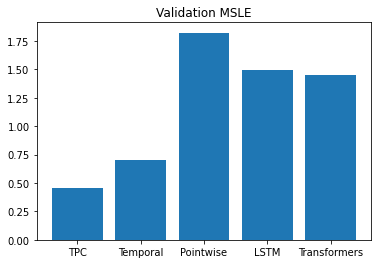

<Figure size 432x288 with 0 Axes>

In [17]:
plot_msle()

**Time Performance Analysis**

Text(0.5, 1.0, 'Execution Time (min)')

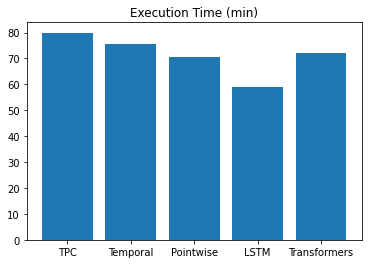

In [18]:
plt.bar(["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"], 
        np.array([time_perf["tpc"], time_perf["temp_only"], time_perf["pointwise_only"], time_perf["lstm"], time_perf["transformer"]])/60)
plt.title("Execution Time (min)")

### 3.2. When Using Loss Function as MSE (Mean Square Error)
#### 3.2.1. Overview
Loss function = MSE
 - Validation MSLE and MSE
 - Comparing to the results when loss function in MLSE

**Models**
 - TPC
 - LSTM
 - Transformers

#### 3.2.2. Code Examples

In [19]:
mse_time_perf = {}

In [20]:
start = time.time()
!python -m models.run_tpc --model_type pointwise_only --n_epochs 5 --loss mse
end = time.time()
mse_time_perf["pointwise_only"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:70.78 min
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "mse",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "pointwise_only",

    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 1715664884,
    "sha

In [21]:
start = time.time()
!python -m models.run_tpc --model_type temp_only --n_epochs 5 --loss mse
end = time.time()
mse_time_perf["temp_only"] = (end - start)
print(f"{(end - start)/60:.2f} min")


 [   270   6531   9664   7940   8536   7392   5501   3948   6921    445]
 [   117   4052   6313   5368   6882   5883   4461   3393   6519    472]
 [    45   2654   4458   4063   5220   4926   3846   2926   6066    421]
 [   130   4992  11041  11588  16587  15643  13144  11305  25269   1497]
 [    10   1965   5454   5785   8704   8469   7507   6958  24182   2654]]
Mean absolute deviation (MAD) = 2.9089561776828496
Mean squared error (MSE) = 54.01671251114021
Mean absolute percentage error (MAPE) = 251.01530747189383
Mean squared logarithmic error (MSLE) = 1.9824288722693746
R^2 Score = 0.12421775044997074
Cohen kappa score = 0.3296339366567429
Epoch: 2 | Validation Loss: 3369.3269
Train Metrics:
==> Length of Stay:
Custom bins confusion matrix:
[[340047 660766 491779 281365 154154  92247  37877  20324  23058   1386]
 [131854 311856 274884 188741 130485  98015  45627  25352  29899   1738]
 [ 54963 150874 151630 117663  95147  85745  44568  25646  31777   1980]
 [ 25698  80116  88852  75

 [  1659   9670  10017   7766   6060   4271   3634   3377   8660   2034]
 [   680   5063   6078   5156   4536   4175   3237   3495   8443   2597]
 [   299   2551   3962   3503   3205   3161   3199   3153   8510   3082]
 [   468   3781   6765   6964   7583   7420   8849  10584  40174  18608]
 [   282   1180   1729   2517   3230   3178   3874   4884  28665  22149]]
Mean absolute deviation (MAD) = 2.497200303662439
Mean squared error (MSE) = 48.52273704737938
Mean absolute percentage error (MAPE) = 169.50498073136802
Mean squared logarithmic error (MSLE) = 1.559268151895803
R^2 Score = 0.21329251947877492
Cohen kappa score = 0.5025887876672208
Epoch: 2 | Validation Loss: 3027.3231
Train Metrics:
==> Length of Stay:
Custom bins confusion matrix:
[[833755 538488 312046 172243  94948  54245  32606  26755  36477   1440]
 [387337 310796 201350 122725  73775  45258  29556  26537  39595   1522]
 [174483 180032 129798  86809  56797  37173  26348  25753  41198   1602]
 [ 74715 106125  87474  64207

In [22]:
start = time.time()
!python -m models.run_tpc --model_type tpc --n_epochs 5 --loss mse
end = time.time()
mse_time_perf["tpc"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
80.03 min
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "mse",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "tpc",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 632293840,
    "share_weights":

In [23]:
start = time.time()
!python -m models.run_lstm --n_epochs 5 --loss mse
end = time.time()
mse_time_perf["lstm"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/LSTM",
    "batch_size": 512,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "bidirectional": false,
    "channelwise": false,
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "LSTM",
    "hidden_size": 128,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00129,
    "loss": "mse",
    "lstm_dropout_rate": 0.2,
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 5,
    "n_layers": 2,
    "name": "LSTM",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "save_results_csv": false,
    "seed": 300539490,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS"
}
Experiment set up.
BaseLSTM(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (hardtanh): Hardtanh(min_val=0.020833333

In [24]:
start = time.time()
!python -m models.run_transformer --n_epochs 5 --loss mse
end = time.time()
mse_time_perf["transformer"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/Transformer",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "d_model": 16,
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "Transformer",
    "feedforward_size": 256,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00017,
    "loss": "mse",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 5,
    "n_heads": 2,
    "n_layers": 6,
    "name": "Transformer",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "positional_encoding": false,
    "save_results_csv": false,
    "seed": 1213173924,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS",
    "trans_dropout_rate": 0
}
Experiment set up.
Transformer(
  (relu): ReLU()
  (sigmoid): Sigmoid

 [ 30598 469170 390624 166788  79231  41928  23242  13508  20833   2529]
 [ 11954 230866 236472 120809  64994  36812  21700  12979  20889   2518]
 [  5349 126401 151317  88504  51610  30695  18708  11593  19312   2541]
 [  2856  75559 102681  66367  40884  25426  15886  10018  17249   2350]
 [  1618  48883  72668  51229  33003  20902  13611   8548  15455   2138]
 [  1030  33094  53330  40266  27575  17711  11476   7391  13444   2123]
 [   675  22408  40400  32708  22525  15090   9804   6279  11916   1936]
 [  1551  56592 118078 103595  75917  52360  35422  24024  46354   7933]
 [   426  23566  58257  61789  50821  38350  27825  20204  44577  11013]]
Mean absolute deviation (MAD) = 2.9728586365532
Mean squared error (MSE) = 33.16740034347181
Mean absolute percentage error (MAPE) = 243.30409552484258
Mean squared logarithmic error (MSLE) = 2.0520090733501766
R^2 Score = 0.09534426395911122
Cohen kappa score = 0.22798714332352765
Epoch: 2 | Train Loss: 2086.7406
Validation Metrics:
==> Le

#### 3.2.3. Results

In [25]:
with open("experiments_paths.json") as f: 
    experiments_paths = json.load(f)

results_path = "\\result\\results.json"
with open(experiments_paths["tpc"] + results_path) as f: tpc_mse_results = json.load(f)
with open(experiments_paths["temp_only"] + results_path) as f: temp_mse_results = json.load(f)
with open(experiments_paths["pointwise_only"] + results_path) as f: pointwise_mse_results = json.load(f)
with open(experiments_paths["LSTM"] + results_path) as f: lstm_mse_results = json.load(f)
with open(experiments_paths["Transformer"] + results_path) as f: transformers_mse_results = json.load(f)

**MSLE**

<AxesSubplot:title={'center':'Validation MSLE'}>

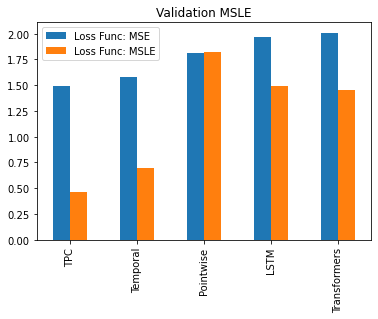

In [26]:
measure = "val_msle"

df = pd.DataFrame(
    {
        "Loss Func: MSE": [tpc_mse_results[measure], temp_mse_results[measure], pointwise_mse_results[measure], lstm_mse_results[measure], transformers_mse_results[measure]],
        "Loss Func: MSLE": [tpc_results[measure], temp_results[measure], pointwise_results[measure], lstm_results[measure], transformers_results[measure]]
    },
    index=["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"]
)

df.plot.bar(title="Validation MSLE")

**MSE**

<AxesSubplot:title={'center':'Validation MSE'}>

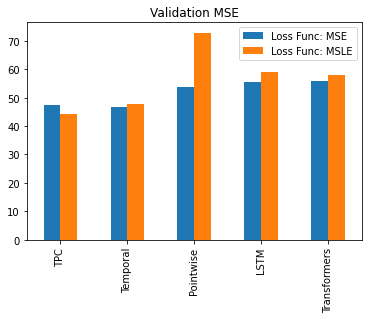

In [27]:
measure = "val_mse"

df_val_mse = pd.DataFrame(
    {
        "Loss Func: MSE": [tpc_mse_results[measure], temp_mse_results[measure], pointwise_mse_results[measure], lstm_mse_results[measure], transformers_mse_results[measure]],
        "Loss Func: MSLE": [tpc_results[measure], temp_results[measure], pointwise_results[measure], lstm_results[measure], transformers_results[measure]]
    },
    index=["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"]
)

df_val_mse.plot.bar(title="Validation MSE")

**Time Performance Analysis**

<AxesSubplot:title={'center':'Execution Time (min)'}>

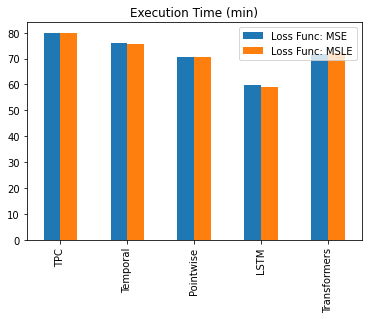

In [28]:
df = pd.DataFrame(
    {
        "Loss Func: MSE": np.array([mse_time_perf["tpc"], mse_time_perf["temp_only"], mse_time_perf["pointwise_only"], mse_time_perf["lstm"], mse_time_perf["transformer"]])/60,
        "Loss Func: MSLE": np.array([time_perf["tpc"], time_perf["temp_only"], time_perf["pointwise_only"], time_perf["lstm"], time_perf["transformer"]])/60
    },
    index=["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"]
)

df.plot.bar(title="Execution Time (min)")

### 3.3. When No Skip Connections
#### 3.3.1. Overview
> We propagate skip connections [20] to allow each layer to see the original data and the pointwise outputs from previous layers. This helps the network to cope with sparsely sampled data.

**Models**
 - TPC
 - TPC (no_skip_connections)

#### 3.3.2. Code Examples

In [29]:
start = time.time()
!python -m models.run_tpc --model_type tpc --n_epochs 5 -no_skip_connections
end = time.time()
no_skip_time = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "tpc",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": true,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 2486731312,
    "share_weights": false,
 


      758]
 [  94543  331403  188812   74475   32479   15685    8200    4876    8088
     1432]
 [  31538  143545  150998   81560   41016   21437   12315    7445   13162
     3014]
 [  13965   68349   96676   68768   40654   23755   14699    9159   18301
     4950]
 [   7553   38141   61313   51417   34825   22314   14590    9967   21095
     6840]
 [   4216   23364   41260   38329   28086   19393   13447    9312   21722
     8311]
 [   2528   14897   29020   28875   22359   15959   11680    8298   20968
     9157]
 [   6057   35202   72342   79229   66608   52748   40553   31163   87648
    50276]
 [   2755   16283   36508   43661   40618   34242   27600   22319   67152
    45690]]
Mean absolute deviation (MAD) = 2.381957754378849
Mean squared error (MSE) = 33.16245398192285
Mean absolute percentage error (MAPE) = 97.69491512575824
Mean squared logarithmic error (MSLE) = 1.0887803029755836
R^2 Score = 0.09547917819120233
Cohen kappa score = 0.5032871309733087
Epoch: 2 | Train Loss: 6

In [30]:
with open("experiments_paths.json") as f: 
    experiments_paths = json.load(f)

results_path = "\\result\\results.json"
with open(experiments_paths["tpc"] + results_path) as f: tpc_no_skip_results = json.load(f)

#### 3.3.3. results

**MSLE**

In [31]:
def plot_no_skip():
    measure = "val_msle"
    plt.bar(["TPC", "TPC (No Skip Connections)"], 
            [tpc_results[measure], tpc_no_skip_results[measure]])
    plt.title("Validation MSLE")
    plt.show()

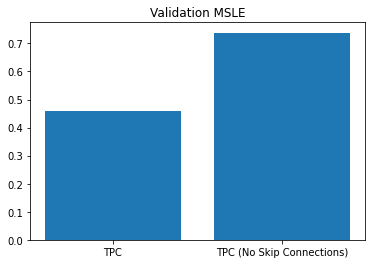

In [32]:
plot_no_skip()

**Time Performance Analysis**

Text(0.5, 1.0, 'Execution Time (min)')

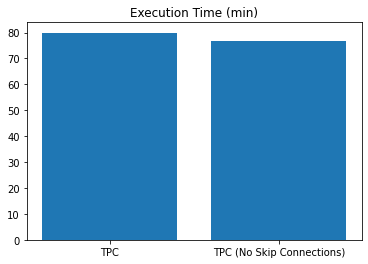

In [33]:
plt.bar(["TPC", "TPC (No Skip Connections)"], 
        np.array([time_perf["tpc"], no_skip_time])/60)
plt.title("Execution Time (min)")

## 4. Summary of the Key Results

### 4.1 TPC is better than the other models

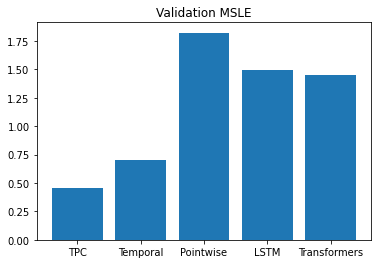

<Figure size 432x288 with 0 Axes>

In [34]:
plot_msle()

### 4.2 MSLE is better loss function than MSE
 - Validation MSE is less when loss function is MSLE.

<AxesSubplot:title={'center':'Validation MSE'}>

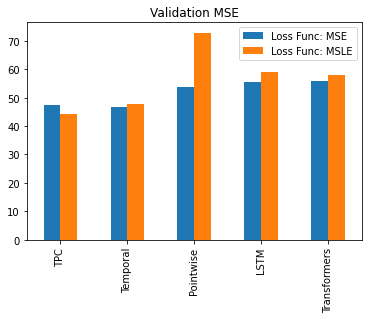

In [35]:
df_val_mse.plot.bar(title="Validation MSE")

### 4.3 Skip connection makes the TPC model better

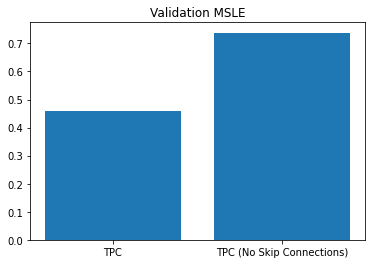

In [36]:
plot_no_skip()

### 4.4 XXX is better optimizer than YYY

In [37]:
# TODO

## References
 - https://dl.acm.org/doi/10.1145/3450439.3451860
 - https://github.com/EmmaRocheteau/TPC-LoS-prediction
 - https://github.com/EmmaRocheteau/MIMIC-IV-Postgres
 - https://github.com/MIT-LCP/mimic-code/
 - https://github.com/MIT-LCP/mimic-iv/

In [38]:
total_end = time.time()
print(f"Total Notebook Time: {(total_end - total_start)/60:.2f} min")

Total Notebook Time: 793.09 min
